> ## **Seaborn**

### Allowed functions : ```import pandas as pd, import sqlite3, import matplotlib.pyplot as plt, import seaborn as sns```

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn=sqlite3.connect('../data/checking-logs.sqlite')

query='''
select *
from sqlite_master
where type like 'table'
'''

pd.read_sql(query,conn)

,type,name,tbl_name,rootpage,sql
0,table,pageviews,pageviews,2,"CREATE TABLE ""pageviews"" (\n""index"" INTEGER,\n..."
1,table,checker,checker,19,"CREATE TABLE ""checker"" (\n""index"" INTEGER,\n ..."
2,table,deadlines,deadlines,83,"CREATE TABLE ""deadlines"" (\n""index"" INTEGER,\n..."


In [9]:
query='''
select uid, numTrials,timestamp
from checker
where uid not like 'admin%'
and status == 'ready'
and labname== 'project1'
'''

commits=pd.read_sql(query,conn,parse_dates='timestamp')
commits

,uid,numTrials,timestamp
0,user_4,1,2020-04-17 05:19:02.744528
1,user_4,2,2020-04-17 05:22:45.549397
2,user_4,3,2020-04-17 05:34:24.422370
3,user_4,4,2020-04-17 05:43:27.773992
4,user_4,5,2020-04-17 05:46:32.275104
...,...,...,...
946,user_19,26,2020-05-15 10:22:39.698523
947,user_19,27,2020-05-15 10:22:46.248162
948,user_19,28,2020-05-15 10:23:18.043212
949,user_28,27,2020-05-15 10:38:14.430013


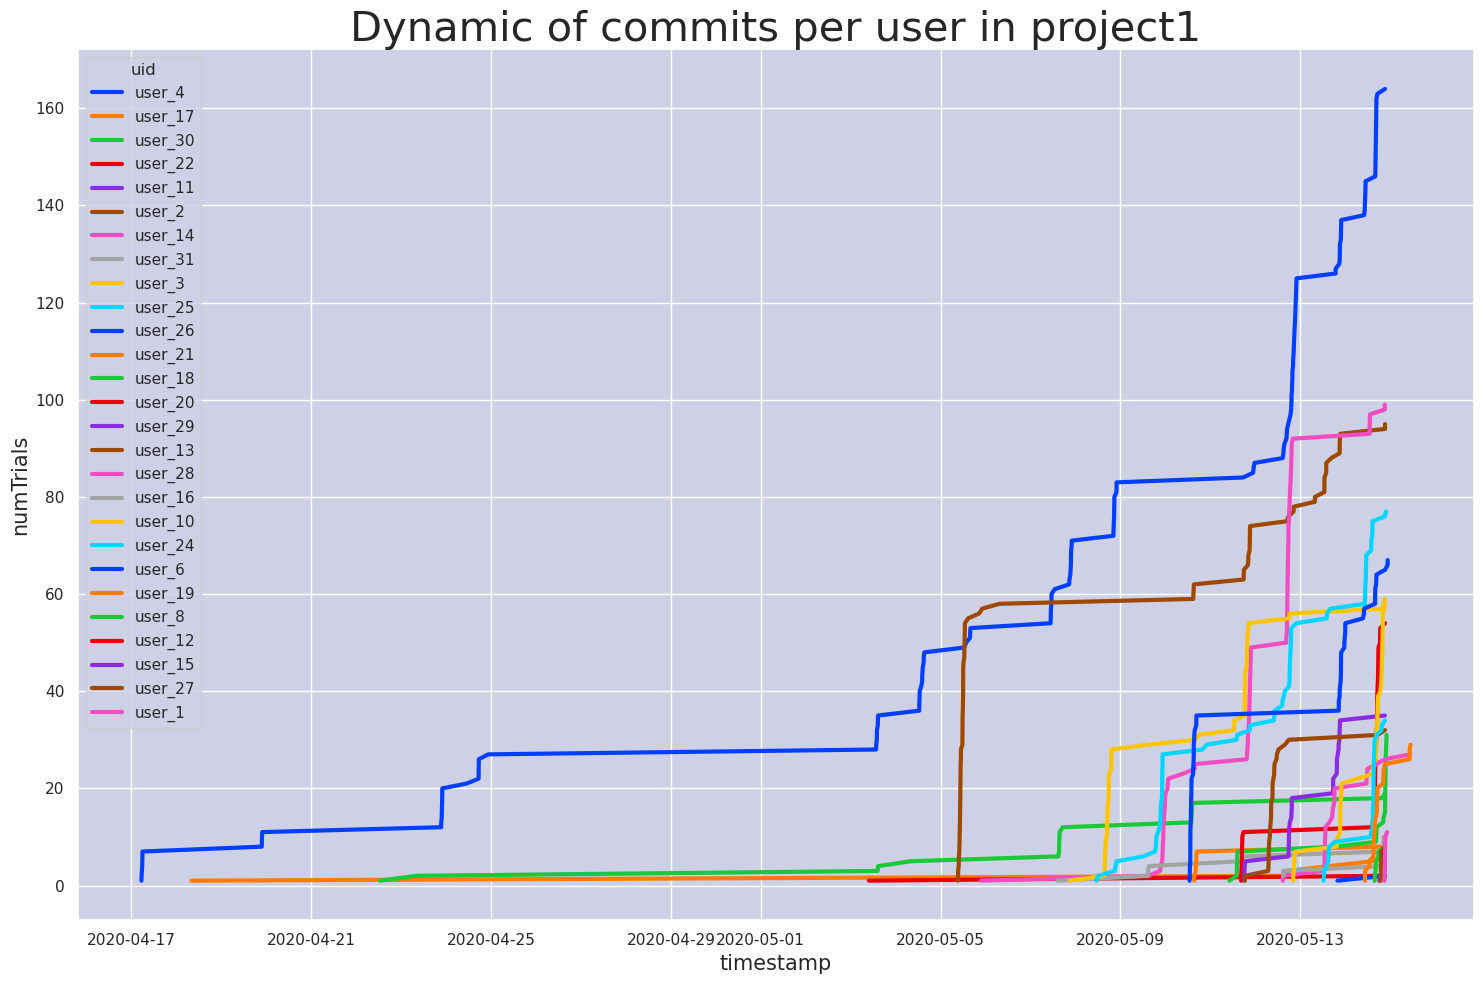

In [34]:
sns.set(style="darkgrid", rc={"axes.facecolor": "#CED1E5"})
plt.figure(figsize=(15, 10))
sns.lineplot(
    data=commits,
    x='timestamp',
    y='numTrials',
    hue='uid',
    palette='bright', 
    linewidth=3,
    legend='full'
)
plt.title("Dynamic of commits per user in project1", fontsize=30)
plt.xlabel("timestamp", fontsize=15)
plt.ylabel("numTrials", fontsize=15)

plt.tight_layout()
plt.show()

## Какой пользователь почти всё время лидировал по количеству коммитов?
> User_4
## Какой пользователь был лидером лишь в течение короткого периода времени?
> User_2


In [35]:
conn.close()